Epoch [100/1000], Loss: 0.1019
Epoch [200/1000], Loss: 0.0123
Epoch [300/1000], Loss: 0.0029
Epoch [400/1000], Loss: 0.0013
Epoch [500/1000], Loss: 0.0008
Epoch [600/1000], Loss: 0.0008
Epoch [700/1000], Loss: 0.0007
Epoch [800/1000], Loss: 0.0007
Epoch [900/1000], Loss: 0.0007
Epoch [1000/1000], Loss: 0.0007


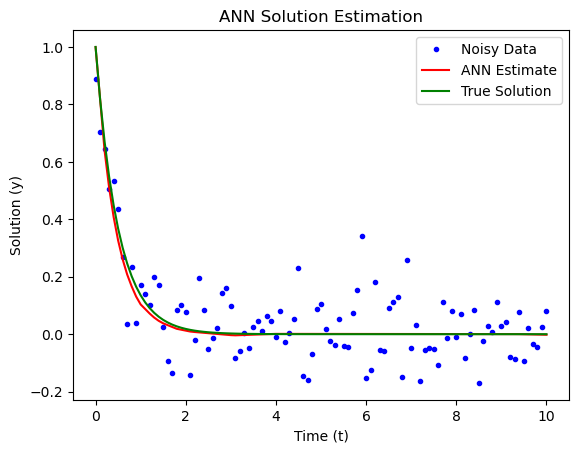

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the initial value problem (IVP)
def f(t, y):
    return -20/10 * y #+ torch.sin(t)

# Generate training data
t_data = torch.linspace(0, 10, 101).view(-1, 1)  # Time values
y_data = torch.exp(-20/10 * t_data)  # True solution to the IVP

# Create a noisy dataset for training
torch.manual_seed(0)
y_data_noisy = y_data + 0.1 * torch.randn_like(y_data)

# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize the neural network, loss function, and optimizer
model = NeuralNet()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 1000
h = t_data[1] - t_data[0]  # Assuming uniform time steps

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(t_data)
    dydt_pred = (y_pred[1:] - y_pred[:-1]) / h
    f_values = f(t_data[:-1], y_pred[:-1])
    loss = torch.mean((dydt_pred - f_values) ** 2+(y_pred[0]-y_data[0])**2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Estimate the solution using the trained ANN
with torch.no_grad():
    y_pred = model(t_data)

# Plot the true solution and the ANN's estimate
plt.figure()
plt.plot(t_data.numpy(), y_data_noisy.numpy(), 'b.', label='Noisy Data')
plt.plot(t_data.numpy(), y_pred.numpy(), 'r', label='ANN Estimate')
plt.plot(t_data.numpy(), y_data.numpy(), 'g', label='True Solution')
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.title('ANN Solution Estimation')
plt.show()


In [2]:
h

tensor([0.1000])